# Business problem:

Companies usually have a greater focus on customer acquisition and keep retention as a secondary priority. However, it can cost five times more to attract a new customer than it does to retain an existing one. Increasing customer retention rates by 5% can increase profits by 25% to 95%, according to research done by Bain & Company.

Churn is a metric that shows customers who stop doing business with a company or a particular service, also known as customer attrition. By following this metric, what most businesses could do was try to understand the reason behind churn numbers and tackle those factors, with reactive action plans.

But what if you could know in advance that a specific customer is likely to leave your business, and have a chance to take proper actions in time to prevent it from happening?
The reasons that lead customers to the cancellation decision can be numerous, coming from poor service quality, delay on customer support, prices, new competitors entering the market, and so on. Usually, there is no single reason, but a combination of events that somehow culminated in customer displeasure.

If your company were not capable to identify these signals and take actions prior to the cancel button click, there is no turning back, your customer is already gone. But you still have something valuable: the data. Your customer left very good clues about where you left to be desired. It can be a valuable source for meaningful insights and to train customer churn models. Learn from the past, and have strategic information at hand to improve future experiences, it’s all about machine learning.

Our goal in this project is to identify high value customers and understand behaviour of the customers who churn, so that we understand those signals from a customer beforehand and take the necessary steps to prevent his/her churn.

# Initialisation

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#plt.style.use('fivethirtyeight')
df = pd.read_csv(r"Telco-Customer-Churn.csv")

In [230]:
df.drop(["customerID"], axis=1, inplace=True)

# Data description

In [231]:
print("Are there any missing columns \n", ((pd.DataFrame(df.isnull().sum()).sum())>0))

Are there any missing columns 
 0    False
dtype: bool


In [232]:
df.describe(include="all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


# Data exploration

## Personal features

In [233]:
#Getting the values for the pie plot
t=df[df.Churn=="Yes"].gender.size
m=(pd.Series(map(int,df[df.Churn=="Yes"].gender=="Male"))).sum()
f=t-m
l1=['Male','Female']
v1=[m,f]

ts=df[df.Churn=="Yes"].SeniorCitizen.size
s=(pd.Series(map(int,df[df.Churn=="Yes"].SeniorCitizen==1))).sum()
ns=ts-s
l2=['Senior Citizen','Not a senior citizen']
v2=[s,ns]

tp=df[df.Churn=="Yes"].Partner.size
p=(pd.Series(map(int,df[df.Churn=="Yes"].Partner=="Yes"))).sum()
np=tp-p
l3=['Committed','Single']
v3=[p,np]
td=df[df.Churn=="Yes"].Dependents.size
d=(pd.Series(map(int,df[df.Churn=="Yes"].Dependents=="Yes"))).sum()
nd=td-d
l4=['Has dependents','No dependents']
v4=[d,nd]

#Making the figure
fig = make_subplots(rows=2,cols=2, specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=l1, values=v1),1,1)
fig.add_trace(go.Pie(labels=l2, values=v2),1,2)
fig.add_trace(go.Pie(labels=l3, values=v3),2,1)
fig.add_trace(go.Pie(labels=l4, values=v4),2,2)

fig.update_traces(hole=0.7, textinfo='label+percent', insidetextorientation='radial', showlegend=False)
fig.update_layout(autosize=False, width=1500, height=800)
fig.update(layout_title_text="Effect of personal factors on churn", layout_title_font_size=24)    
fig.show()

Observations:

* Gender has no influence on churn
* Single people are more likely to churn
* People without dependents are more likely to churn

## Contract features

Text(0.5, 0.98, 'Relation between the type of contract and churn')

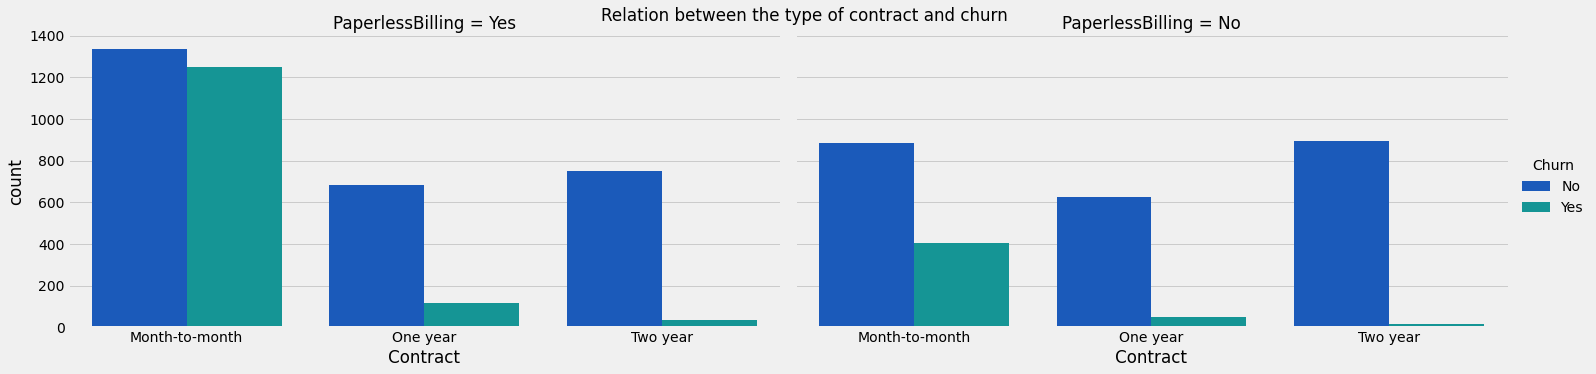

In [296]:
g=sns.catplot(data=df, x="Contract", col="PaperlessBilling", hue="Churn", kind="count", palette="winter", height=5, aspect=2.1)
g.fig.suptitle("Relation between the type of contract and churn")


Observations:

* Maximum people who churn are on a monthly contract and mostly bill in a paperless manner. Maybe these are tech savvy people who switch to a different carrier as soon as they find a better deal

In [300]:
fig1 = go.Figure(data=[
go.Bar(name="Churn", x= pd.DataFrame(df[df.Churn=="Yes"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().index, y=pd.DataFrame(df[df.Churn=="Yes"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().values),
go.Bar(name="Non churn", x= pd.DataFrame(df[df.Churn=="No"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().index, y=pd.DataFrame(df[df.Churn=="No"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().values)])

# Change the bar mode
fig1.update_layout(barmode='relative', width=1280, height=400)
fig1.update(layout_title_text="Relation between type of payment and churn", layout_title_font_size=24)    
fig1.show()

Observations

* Maximum people who pay electronically, churn. This supports our hypothesis that tech savvy people churn more often.

In [270]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.TotalCharges.fillna(0, inplace=True)

Text(0.5, 1.0, 'Relation between charges and churn')

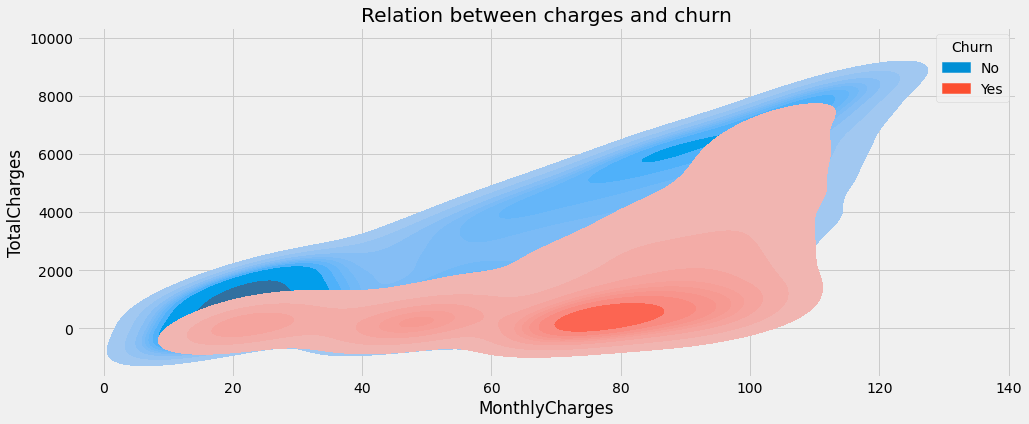

In [301]:
plt.figure(figsize=(15,6))
sns.kdeplot(x=df.MonthlyCharges, y=df.TotalCharges, hue=df.Churn, fill=True, multiple="stack")
plt.title("Relation between charges and churn")

Observations

* Most of the people who churn have low total charges with the carrier. 
* Some people who churn are customers who have high monthly and total charges. These are valuable customers and we would want to retain them.

Text(0.5, 1.0, 'Distribution of tenure with churn')

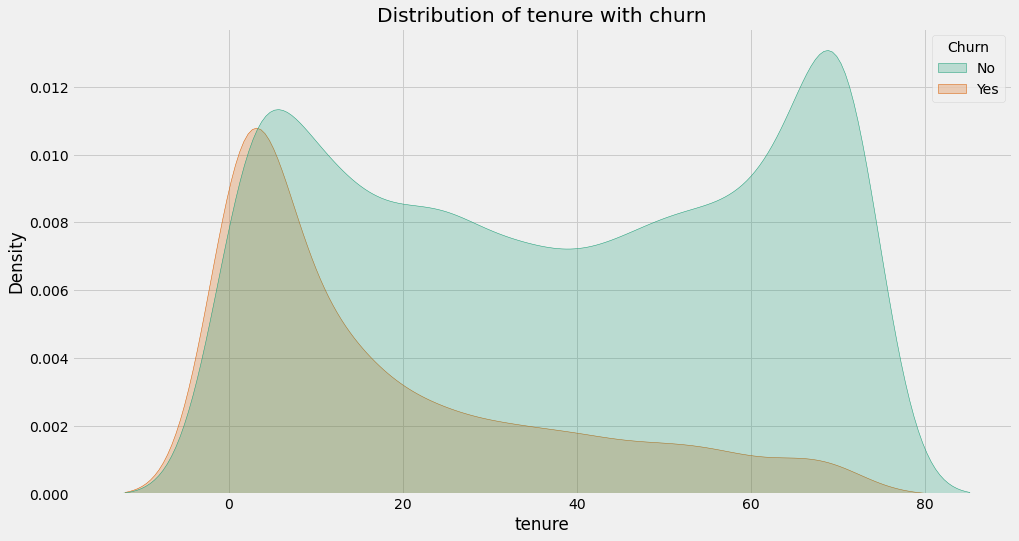

In [324]:
plt.figure(figsize=(15,8))
sns.kdeplot(df.tenure,hue=df.Churn, shade=True, palette="Dark2")
plt.title("Distribution of tenure with churn")

Observations:

* Maximum customers who churn churn in the early period. We have to try to reduce early discontinuations of our service